In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.special import erfinv
from scipy.stats import skew, kurtosis


# task 1
## a) Vérification de la densité de probabilité f(E_ω)

La densité de probabilité est définie par :

$$
f(E_\omega) = \frac{A}{\sqrt{E_\omega}} e^{-\beta E_\omega}
$$

où :
- \( A \) est un facteur de normalisation,
- \( \beta = \frac{1}{k_B T} \) est une constante liée à la température (\( k_B \) étant la constante de Boltzmann et \( T \) la température en Kelvin).

---

### **Vérification de la positivité**

Les termes de \( f(E_\omega) \) sont :
1. \( \frac{1}{\sqrt{E_\omega}} > 0 \) pour \( E_\omega > 0 \),
2. \( e^{-\beta E_\omega} > 0 \) pour tout \( \beta > 0 \) et \( E_\omega \geq 0 \),
3. \( A > 0 \) lorsqu'il est défini correctement.

Ainsi, \( f(E_\omega) \geq 0 \) pour \( E_\omega > 0 \). La densité est donc positive.

---

### **Vérification de la normalisation**

Pour vérifier que \( f(E_\omega) \) est une densité de probabilité valide, nous devons montrer que :

$$
\int_0^{\infty} f(E_\omega) \, dE_\omega = 1
$$

Substituons \( f(E_\omega) \) :

$$
\int_0^{\infty} \frac{A}{\sqrt{E_\omega}} e^{-\beta E_\omega} \, dE_\omega = 1
$$

Simplifions :
- Le facteur \( A \) peut être sorti de l'intégrale.

$$
A \int_0^{\infty} \frac{1}{\sqrt{E_\omega}} e^{-\beta E_\omega} \, dE_\omega = 1
$$

Nous utilisons le changement de variable \( x = \beta E_\omega \), donc \( dE_\omega = \frac{dx}{\beta} \).

Les bornes restent inchangées, et l'intégrale devient :

$$
A \int_0^{\infty} \frac{\sqrt{\beta}}{\sqrt{x}} e^{-x} \frac{dx}{\beta} = 1
$$

Simplifions encore :

$$
A \cdot \frac{1}{\sqrt{\beta}} \int_0^{\infty} \frac{1}{\sqrt{x}} e^{-x} \, dx = 1
$$

L'intégrale \( \int_0^{\infty} x^{-1/2} e^{-x} \, dx = \sqrt{\pi} \) est une intégrale gamma (\( \Gamma(1/2) \)) :

$$
A \cdot \frac{\sqrt{\pi}}{\sqrt{\beta}} = 1
$$

En isolant \( A \), nous trouvons :

$$
A = \frac{\sqrt{\beta}}{\sqrt{\pi}}
$$

---

### **Conclusion**

La densité de probabilité normalisée est donnée par :

$$
f(E_\omega) = \frac{\sqrt{\beta}}{\sqrt{\pi} \sqrt{E_\omega}} e^{-\beta E_\omega}
$$

Elle est :
1. Positive pour \( E_\omega > 0 \),
2. Normalisée avec \( \int_0^{\infty} f(E_\omega) \, dE_\omega = 1 \).


## b) Simulation Monte-Carlo

Dans cette section, nous utilisons la méthode Monte Carlo pour :
1. Générer des échantillons \( E_\omega \) en utilisant la méthode de l'inverse.
2. Comparer l'histogramme des échantillons avec la densité analytique \( f(E_\omega) \).


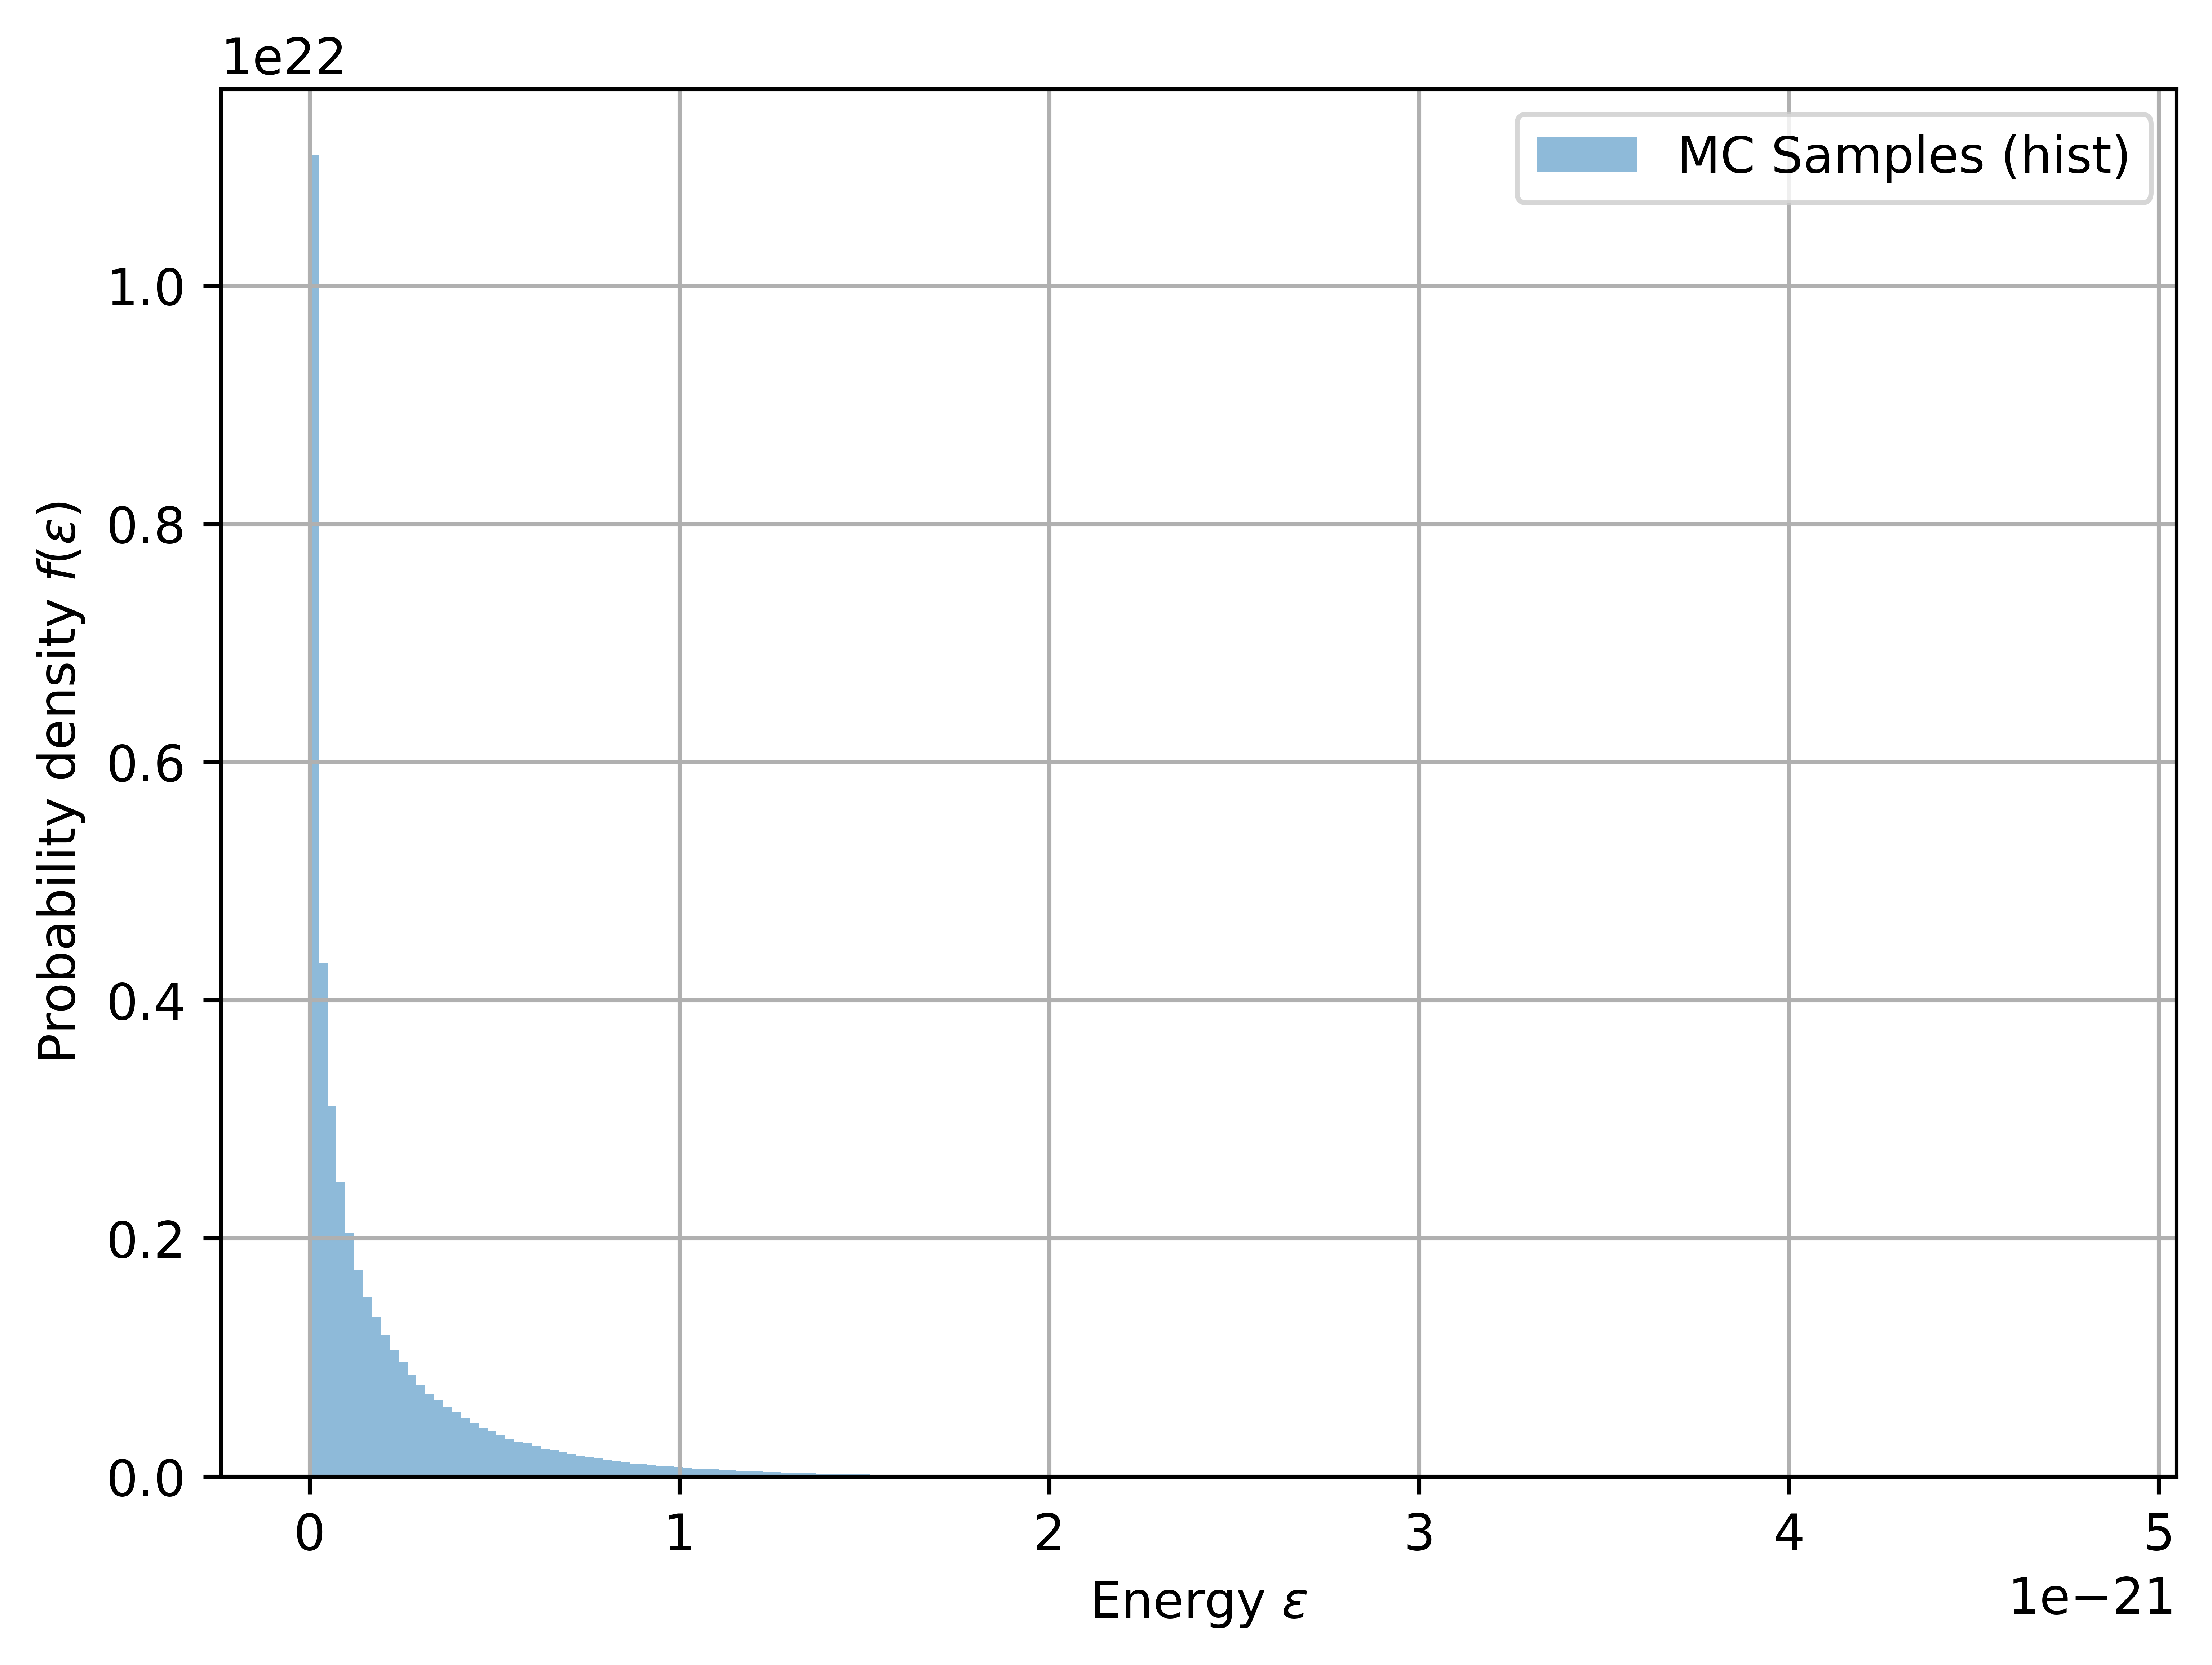

In [21]:
# Constantes physiques
m0 = 1.66e-27  # Masse atomique (kg)
K_40_mass = 40 * m0  # Masse de K-40 (kg)
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)
beta = 1 / (kb * T)  # Inverse de la température

A = np.sqrt(beta / math.pi)  # Facteur de normalisation

# Méthode de l'inverse pour générer des échantillons
def sample_energy_inverse_transform(N, beta):
    """Génère des échantillons via la méthode de l'inverse."""
    U = np.random.rand(N)
    return (erfinv(U) ** 2) / beta

# Densité de probabilité analytique
def pdf(eps, beta):
    """Densité de probabilité analytique."""
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)


# Génération des échantillons
N = 1000000  # Nombre d'échantillons
energy_samples = sample_energy_inverse_transform(N, beta)

# Histogramme
bins = 200
hist, bin_edges = np.histogram(energy_samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot de l'histogram
plt.figure(figsize=(7,5), dpi=1000)
plt.bar(bin_centers, hist, width=(bin_edges[1]-bin_edges[0]),alpha=0.5, label='MC Samples (hist)')


# Plot de la densité de manière analytique
eps_grid = np.linspace(0, np.percentile(energy_samples, 99.0), 500)
pdf_values = pdf(eps_grid, beta)
plt.plot(eps_grid, pdf_values, 'r-', label='Analytical PDF')




# Tracé
plt.xlabel(r'Energy $\varepsilon$')
plt.ylabel(r'Probability density $f(\varepsilon)$')
plt.legend()
plt.grid(True)
plt.show()


## c) Calcul de la moyenne d'échantillon et comparaison avec la valeur analytique

Dans cette section, nous calculons la moyenne des échantillons et la comparons à la valeur analytique :
\[
\langle E_\omega \rangle = \frac{1}{2} k_B T
\]


In [ ]:
# Moyenne analytique
analytical_expectation_value = 0.5 * kb * T

# Moyenne des échantillons
mean_values = np.mean(energy_samples)

# Résultats
print(f"Sample Mean <Ew>: {mean_values:.5e} J")
print(f"Analytical Expectation Value: {analytical_expectation_value:.5e} J")
print(f"Relative Error: {abs(mean_values - analytical_expectation_value) / analytical_expectation_value:.5e}")
